## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

In [33]:
import numpy as np 
import numpy.linalg as np
import matplotlib.pyplot as plt
import math
import sympy as sym
from SolveTriangular import *
import sys, os

sys.path.append(os.path.abspath('../../Scheletri'))

import Schel_FULL as sf

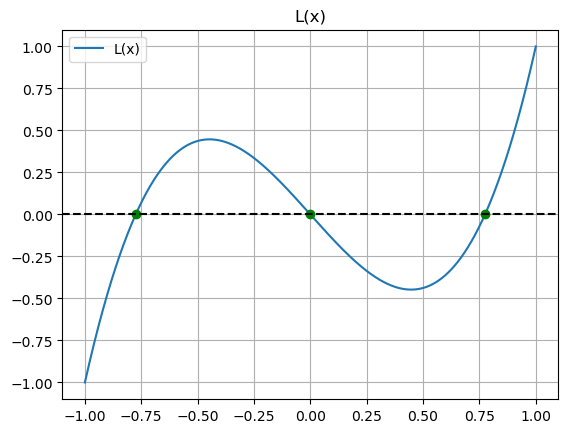

In [34]:
x = sym.symbols('x')

L_sym = (1/2)*(5*x**3 - 3*x)
Ld_sym = sym.diff(L_sym, x)

L = sym.lambdify(x, L_sym, np)
Ld = sym.lambdify(x, Ld_sym, np)



tolx = 1e-12
tolf = 1e-12
nmax = 1000

a1, b1 = (-1, -0.5)
a2, b2 = (-0.25, 0.25)
a3, b3 = (0.5, 1)

sol_bis1, numit_bis1, vec_sol_bis1 = sf.metodo_bisezione(L,a1,b1, tolx, tolf)
sol_bis2, numit_bis2, vec_sol_bis2 = sf.metodo_bisezione(L,a2,b2, tolx, tolf)
sol_bis3, numit_bis3, vec_sol_bis3 = sf.metodo_bisezione(L,a3,b3, tolx, tolf)

xx = np.linspace(-1,1, 2000)

yy = L(xx)

plt.title('L(x)')
plt.plot(xx, yy, label='L(x)')
plt.plot(sol_bis1, L(sol_bis1), 'go')
plt.plot(sol_bis2, L(sol_bis2), 'go')
plt.plot(sol_bis3, L(sol_bis3), 'go')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()



Zero di L con newton :  0.7745966692414834 in  6 iterazioni


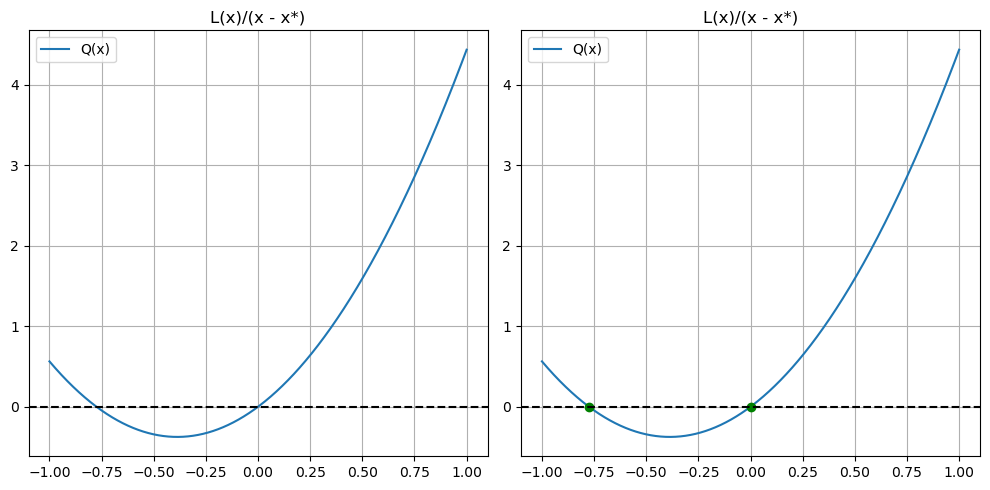

Zero di Q con newton :  1.232595164407831e-32 in  7 iterazioni
Zero di Q è anche zero di L


In [36]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Assuming L, Ld, and other symbols are predefined

x0 = 1
sol_nt, numit_nt, vec_sol_nt = sf.newton(L, Ld, x0, tolx, tolf, nmax)

print("Zero di L con newton : ", sol_nt, "in ", numit_nt, "iterazioni")

Q_sym = L_sym / (x - sol_nt)
Qd_sym = sym.diff(Q_sym, x)

Q = sym.lambdify(x, Q_sym, np)
Qd = sym.lambdify(x, Qd_sym, np)

xx = np.linspace(-1, 1, 2000)
yy = Q(xx)

# Create subplots using the object-oriented interface
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot on the first axis (ax1)
ax1.set_title('L(x)/(x - x*)')
ax1.plot(xx, yy, label='Q(x)')
ax1.axhline(0, color='black', linestyle='--')
ax1.grid(True)
ax1.legend()

# Additional data for the second plot
x0_q = -0.5
a1_q, b1_q = (-1, -0.5)
a2_q, b2_q = (-0.25, 0.25)

sol_nt_q, numit_nt_q, vec_sol_nt_q = sf.newton(Q, Qd, x0, tolx, tolf, nmax)

sol_bis_q1, numit_bis_q1, vec_sol_bis_q1 = sf.metodo_bisezione(Q, a1_q, b1_q, tolx, tolf)
sol_bis_q2, numit_bis_q2, vec_sol_bis_q2 = sf.metodo_bisezione(Q, a2_q, b2_q, tolx, tolf)

# Plot on the second axis (ax2)
ax2.set_title('L(x)/(x - x*)')
ax2.plot(xx, yy, label='Q(x)')
ax2.plot(sol_bis_q1, Q(sol_bis_q1), 'go')
ax2.plot(sol_bis_q2, Q(sol_bis_q2), 'go')
ax2.axhline(0, color='black', linestyle='--')
ax2.grid(True)
ax2.legend()

# Adjust layout for better spacing
fig.tight_layout()
plt.show()

print("Zero di Q con newton : ", sol_nt_q, "in ", numit_nt_q, "iterazioni")

# Check if the zero of Q is also a zero of L
if abs(L(sol_nt_q)) <= tolf:
    print("Zero di Q è anche zero di L")
else:
    print("Zero di Q NON è anche zero di L")


                                                                                                                Punti [14]